<h3>The impact of COVID 19 on Johnson & Johnson close price</h3>

In [83]:
#!pip install pmdarima
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import pmdarima as pmd

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')


<h5>Creating the functions </h5>

In [84]:
def plot_train_test(data_train: pd.DataFrame, data_test:pd.DataFrame, actual:str, predicted:str):
    plt.figure(figsize=(12,6))
    plt.plot(data_train.index[1:], data_train[actual][1:], color='blue', label=actual)
    plt.plot(data_train.index[1:], data_train[predicted][1:], color='orange', label=f'{predicted} train')
    
    plt.plot(data_test.index, test[actual], color='blue', label='')

    plt.plot(data_test.index, test[predicted], color='red', label=f'{predicted} test')

    plt.title('Prediction of Johnson&Johnson price')
    plt.xlabel('Date')
    plt.ylabel('Values')

    plt.legend()

    plt.show()


def train_and_plot(data_train:pd.DataFrame,data_test:pd.DataFrame,p:int, i:int,q:int, actual:str,length_test:int):
    model = ARIMA(data_train[actual], order=(p, i, q)).fit()
    print((model.summary()))
    label = f"ARIMA_{p}_{i}_{q}"
    train[label] = model.fittedvalues
    test[label] = model.forecast(length_test+1)
    plot_train_test(data_train=data_train, data_test=data_test, actual=actual,predicted=label)
    


    

<h5>Data import</h5>

In [85]:
df = pd.read_csv("JNJ.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Price_JNJ
Date,
2014-01-01,88.470001
2014-02-01,92.120003
2014-03-01,98.230003
2014-04-01,101.290001
2014-05-01,101.459999
...,...
2023-08-01,161.679993
2023-09-01,155.750000
2023-10-01,148.339996


<h4>Exploratory analysis</h4>

In [86]:
summary = df['Price_JNJ'].describe()
print(summary)

count    120.000000
mean     135.387917
std       25.116780
min       88.470001
25%      113.110000
50%      134.584999
75%      156.132496
max      180.460007
Name: Price_JNJ, dtype: float64


Analyzing the output from above (2014-2024), we can identify the average value for Johnson&Johnson close price which is approximately 135 dollars. Also, the minimum value for Johnson&Johnson price is approximately 88 dollars and the maximum value is approximately 180 dollars. Regarding the median, we can say that its value is approximately 134 dollars which means that 50% from values are lower than 134 dollars and 50% from values are greater than 134 dollars. Considering the first quartile, we can say that 25% from values are lower than 113 dollars and 75% from values are greater than 113 dollars. Also, in case of the third quartile, we can say that 25% from values are greater than 156 dolars and 75% from values are lower than 156 dollars.

<h5>Boxplot for Johnson&Johnson close price</h5>

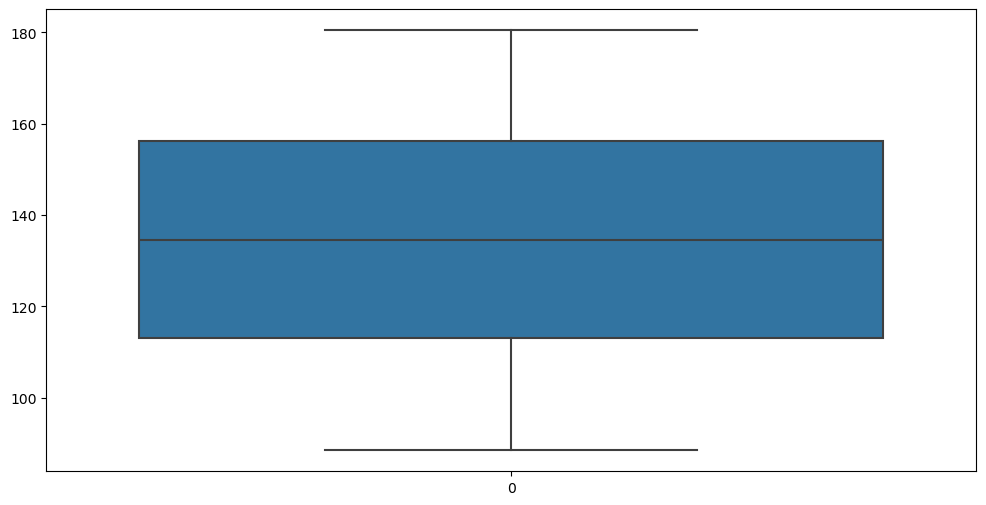

In [87]:
plt.figure(figsize=(12,6))
g = sns.boxplot(df['Price_JNJ'],showfliers=0)

In [88]:
df['year']=df.index.year

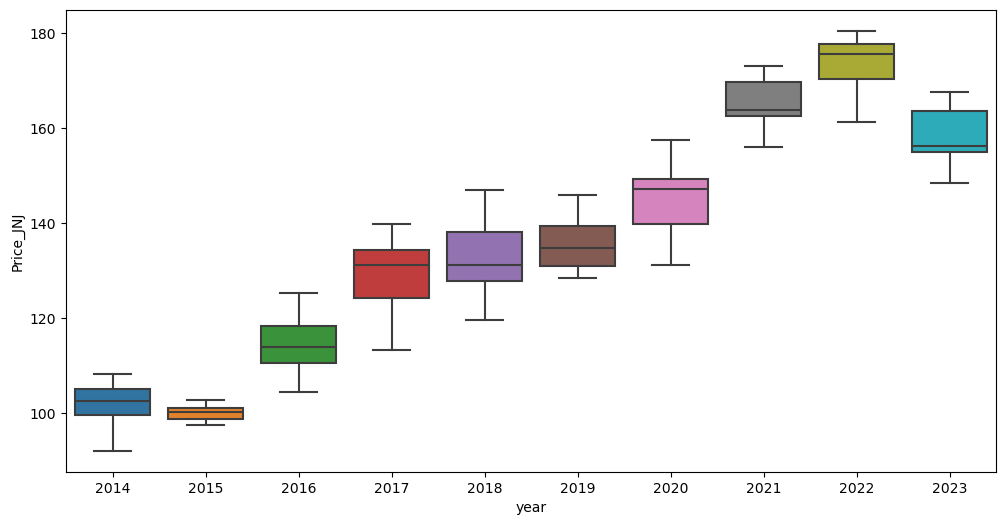

In [89]:
plt.figure(figsize=(12,6))
g = sns.boxplot(df,x='year',y='Price_JNJ',showfliers=0)


<h5>Histogram for Johnson&Johnson close price in 2014-2024</h5>

Text(0.5, 1.0, 'Histogram for close price JNJ')

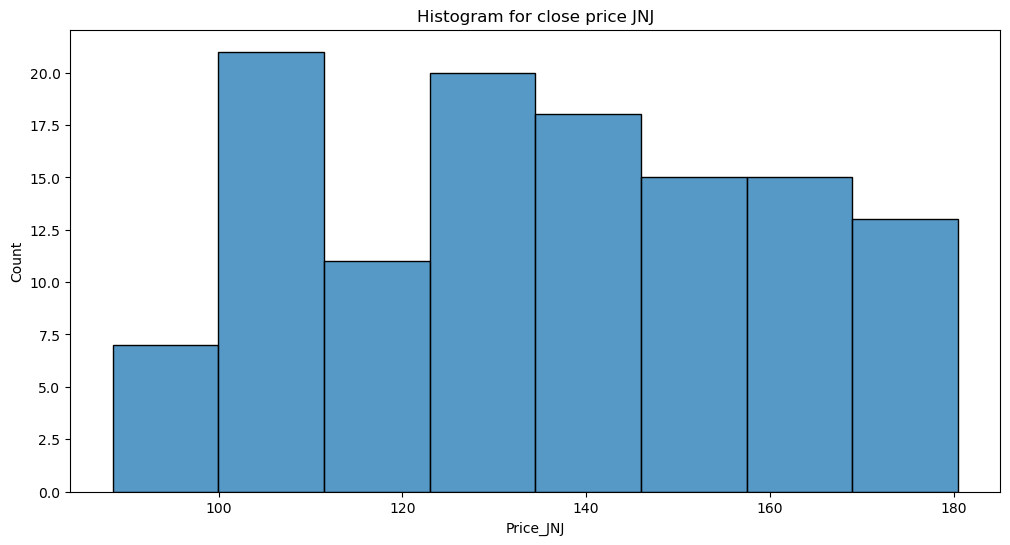

In [90]:
plt.figure(figsize=(12,6))
g = sns.histplot(df['Price_JNJ'])
g.set_title('Histogram for close price JNJ')

Analyzing the output from above, we could say that Johnson & Johnson close price have registered oscillating values during this period. So, the maximum frequency have registered around the price of 100-110 dollars. Then, we can identify a sudden decrease in frequencies, around the price of 110-120 dollars. Starting with 130 dollars, there are high frequencies being in a slight decrease until the of the analyzed period.  

<h4>Checking the existing missing values</h4>

In [91]:
valori_lipsa = df.isnull().any()
print("Missing values:")
print(valori_lipsa)

Missing values:
Price_JNJ    False
year         False
dtype: bool


There are no missing values in data. So, we can continue the analysis.

<h4>The evolution for Johnson&Johnson close price in 2014 - 2024</h4>

Text(0.5, 1.0, 'Close price JNJ (initial series)')

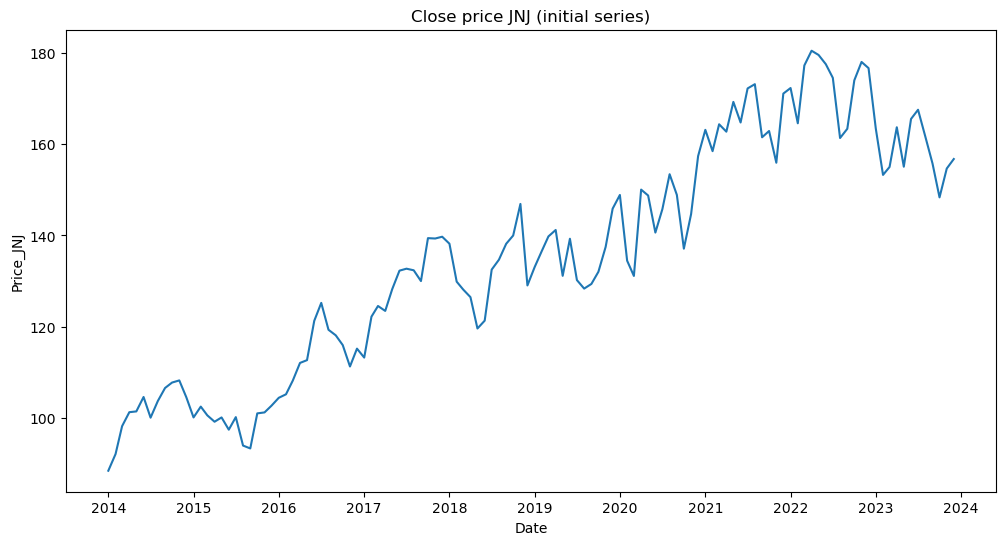

In [92]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Date',y='Price_JNJ')
g.set_title('Close price JNJ (initial series)')


The graph from above shows the evolution of Johnson&Johnson close price in 2014-2024. So, we can say that the close price for Johnson & Johnson have been in increase for this analyzed period. However, in the pandemic period we can identify the highest close price for JNJ, reaching up to 180 dollars in 2022. After the pandemic period, the company's price starts o decrease.

<h4>Testul Augumented Dickey Fuller (ADF)</h4>

In [93]:
result = adfuller(df['Price_JNJ'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.295886
p-value: 0.631052
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581


Applying the ADF test, we notice that the value of the statistical test is lower (in module) compared to critical values. So, we can say that the series is non-stationary and it's necessary to diiferentiate.

<h4>Correlogram of initial series (ACF and PACF)</h4>

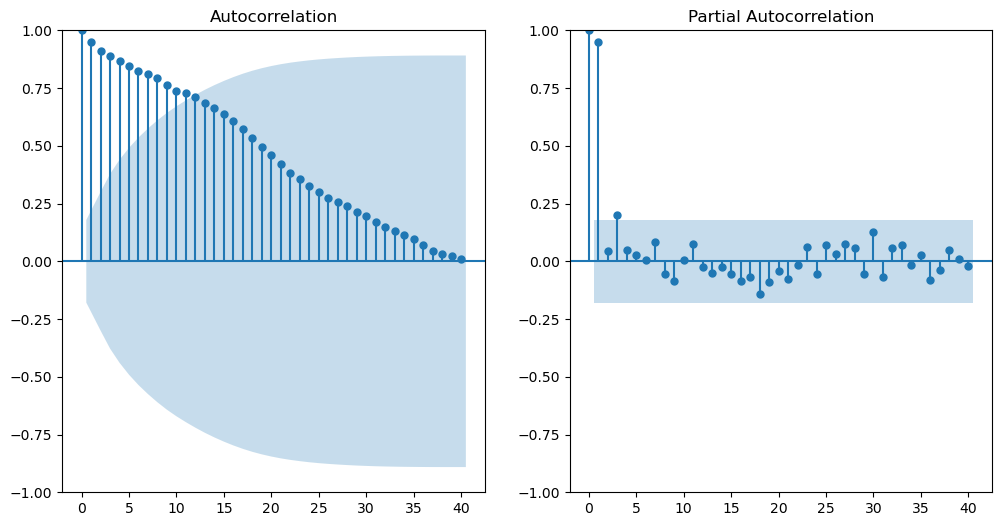

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Price_JNJ'], ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(df['Price_JNJ'], ax=plt.gca(), lags=40)
plt.show()

Also, we can identify from ACF and PACF graphs that the series is non-stationary.

<h4>Differentiate the series</h4>

In [95]:
from statsmodels.tsa.stattools import adfuller
df['Price_diff_1'] = df['Price_JNJ'].diff()
df.dropna(inplace=True)
result = adfuller(df['Price_diff_1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.539855
p-value: 0.000000
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581


After differentiating the series, we have applied the ADF test and noticed that the value for the statisctical test is greater (in module) than the critical values. So, the series is stationary now.

<H4>Differentiate series graph</H4>

Text(0.5, 1.0, 'Close price of JNJ (differentiate series)')

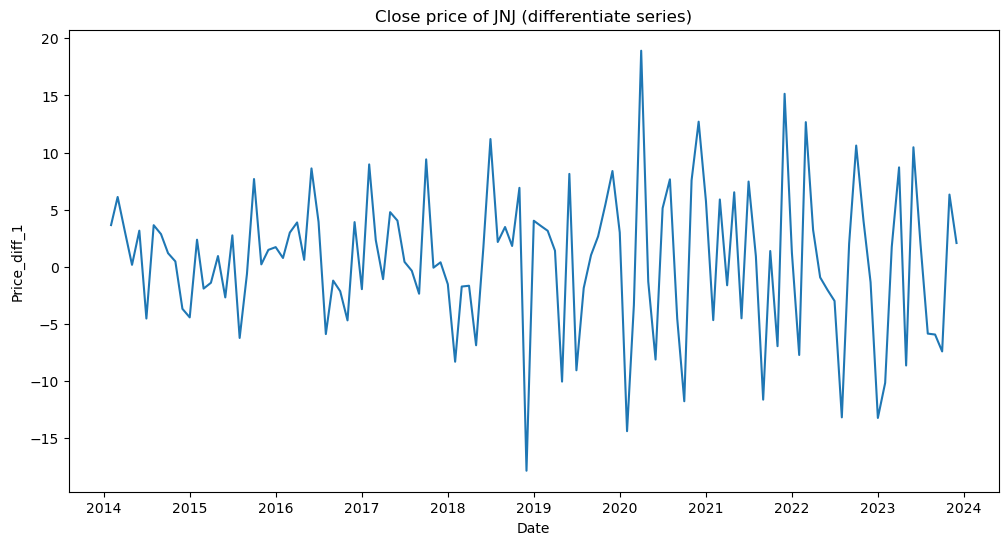

In [96]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df, x='Date',y='Price_diff_1')
g.set_title('Close price of JNJ (differentiate series)') 


In [97]:
length_test = 12
train = df[0:-length_test].copy()
test = df[-length_test:].copy()

<h4>Correlogram for differentiate series (ACF and PACF)</h4>

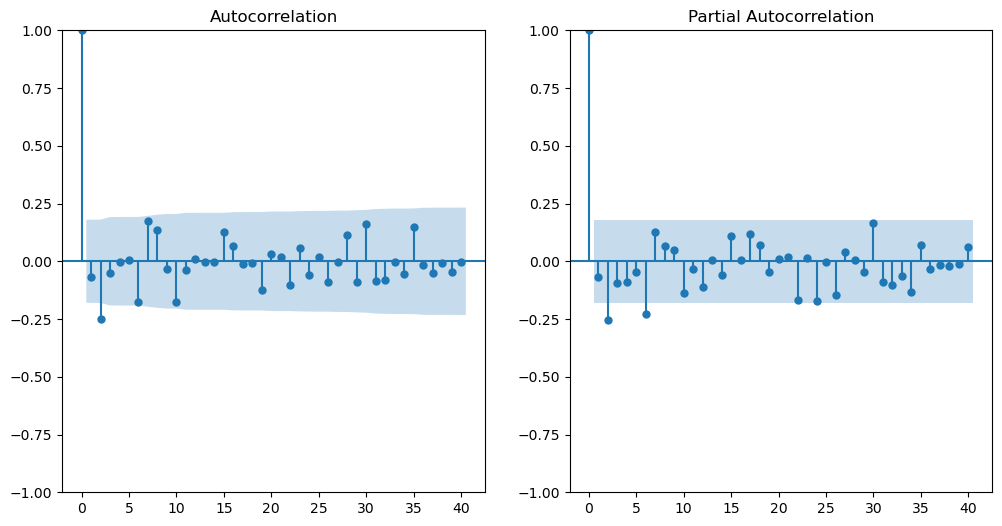

In [98]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Price_diff_1'].dropna(), ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(df['Price_diff_1'].dropna(), ax=plt.gca(), lags=40)
plt.show()

The graphs from above (ACF and PACF) help us to identify the number of significant lags. So, we could say that we have only one significant lag for both ACF and PACF.

<h4>Choosing the optimal ARIMA model</h4>

                               SARIMAX Results                                
Dep. Variable:              Price_JNJ   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -340.234
Date:                Sat, 29 Jun 2024   AIC                            686.469
Time:                        15:37:46   BIC                            694.459
Sample:                    02-01-2014   HQIC                           689.707
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.272      1.925      0.054      -0.010       1.056
ma.L1         -0.7243      0.216     -3.357      0.001      -1.147      -0.301
sigma2        35.8946      5.565      6.450      0.0

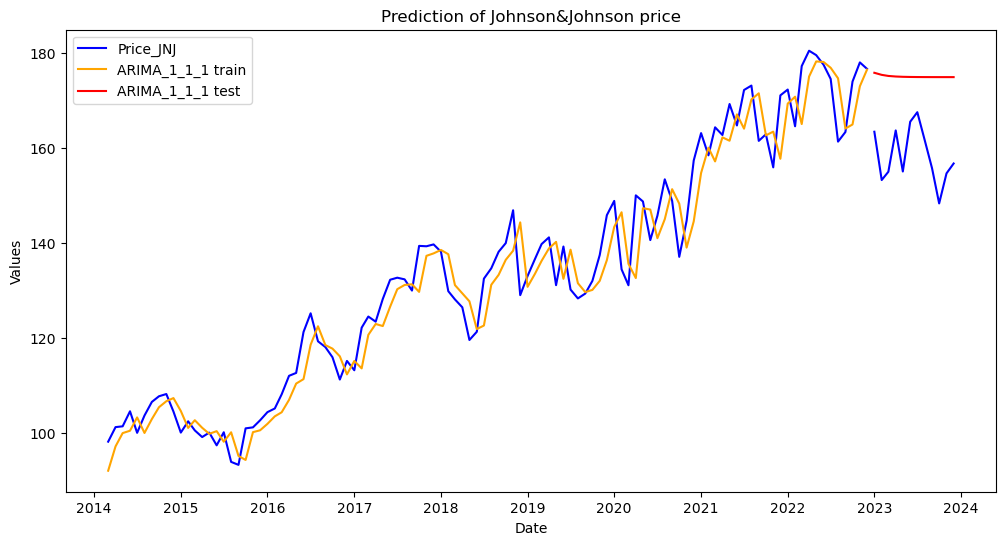

In [99]:
p = 1
i = 1
q = 1

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Price_JNJ',length_test=length_test)

Analyzing the output from above, we notice:

- according to Ljung-Box autocorrelation test with the probability 0.91 > 0.05, we can say that the residuals are not autocorrelated.
- according to the heteroscedasticity test with the probability 0.00 > 0.05, we have heteroscedasticity in the residuals
- according to the Jarque-Bera normality test with the probability 0.36 > 0.05, we can say that the residuals are normally distributed.

Also, we can identify the value for informational criterion AIC which is 686.469.

                               SARIMAX Results                                
Dep. Variable:              Price_JNJ   No. Observations:                  107
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -342.233
Date:                Sat, 29 Jun 2024   AIC                            688.466
Time:                        15:37:47   BIC                            693.793
Sample:                    02-01-2014   HQIC                           690.625
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1732      0.115     -1.512      0.130      -0.398       0.051
sigma2        37.3024      5.308      7.028      0.000      26.899      47.705
Ljung-Box (L1) (Q):                   0.04   Jarque-

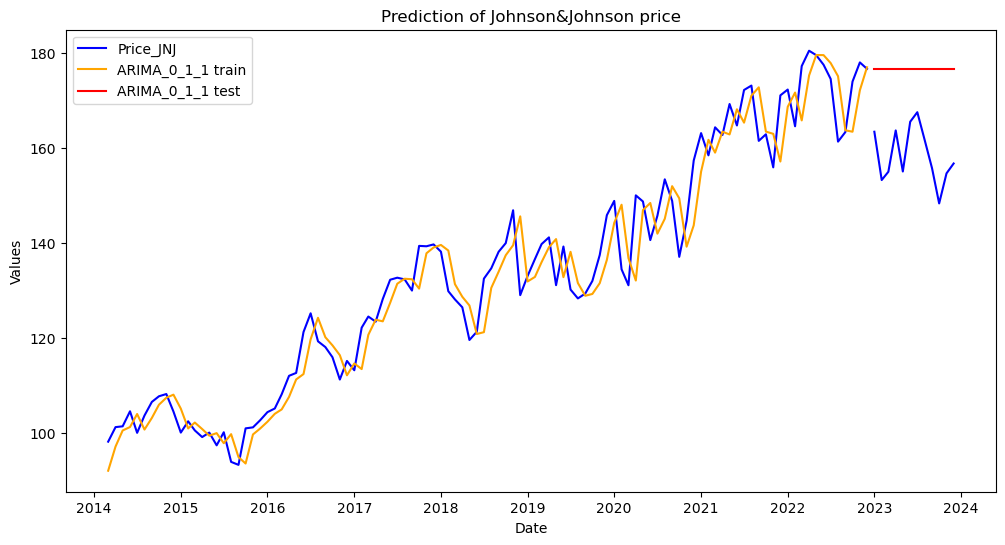

In [100]:
p = 0
i = 1
q = 1

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Price_JNJ',length_test=length_test)

Analyzing the output from above, we notice:

- according to Ljung-Box autocorrelation test with the probability 0.84 > 0.05, we can say that the residuals are not autocorrelated.
- according to the heteroscedasticity test with the probability 0.00 > 0.05, we have heteroscedasticity in the residuals
- according to the Jarque-Bera normality test with the probability 0.29 > 0.05, we can say that the residuals are normally distributed.

Also, we can identify the value for informational criterion AIC which is 688.466.

                               SARIMAX Results                                
Dep. Variable:              Price_JNJ   No. Observations:                  107
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -342.640
Date:                Sat, 29 Jun 2024   AIC                            689.281
Time:                        15:37:47   BIC                            694.607
Sample:                    02-01-2014   HQIC                           691.440
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0871      0.118     -0.741      0.459      -0.318       0.143
sigma2        37.6032      4.762      7.897      0.000      28.270      46.936
Ljung-Box (L1) (Q):                   0.19   Jarque-

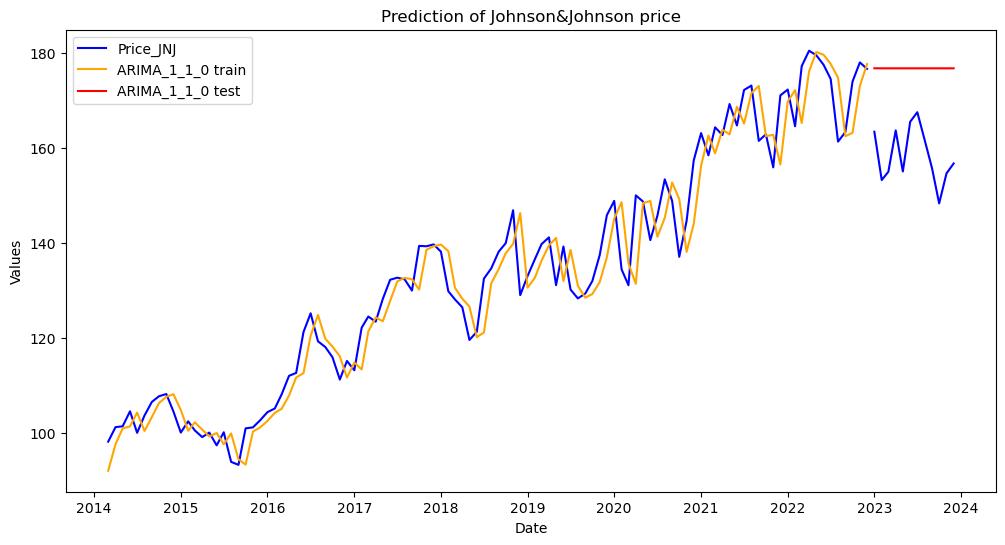

In [101]:
p = 1
i = 1
q = 0

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Price_JNJ',length_test=length_test)

Analyzing the output from above, we notice:

- according to Ljung-Box autocorrelation test with the probability 0.66 > 0.05, we can say that the residuals are not autocorrelated.
- according to the heteroscedasticity test with the probability 0.00 > 0.05, we have heteroscedasticity in the residuals
- according to the Jarque-Bera normality test with the probability 0.19 > 0.05, we can say that the residuals are normally distributed.

Also, we can identify the value for informational criterion AIC which is 689.281.

                               SARIMAX Results                                
Dep. Variable:              Price_JNJ   No. Observations:                  107
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -343.044
Date:                Sat, 29 Jun 2024   AIC                            688.088
Time:                        15:37:48   BIC                            690.752
Sample:                    02-01-2014   HQIC                           689.168
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        37.8889      4.455      8.506      0.000      29.158      46.620
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.27   Pr

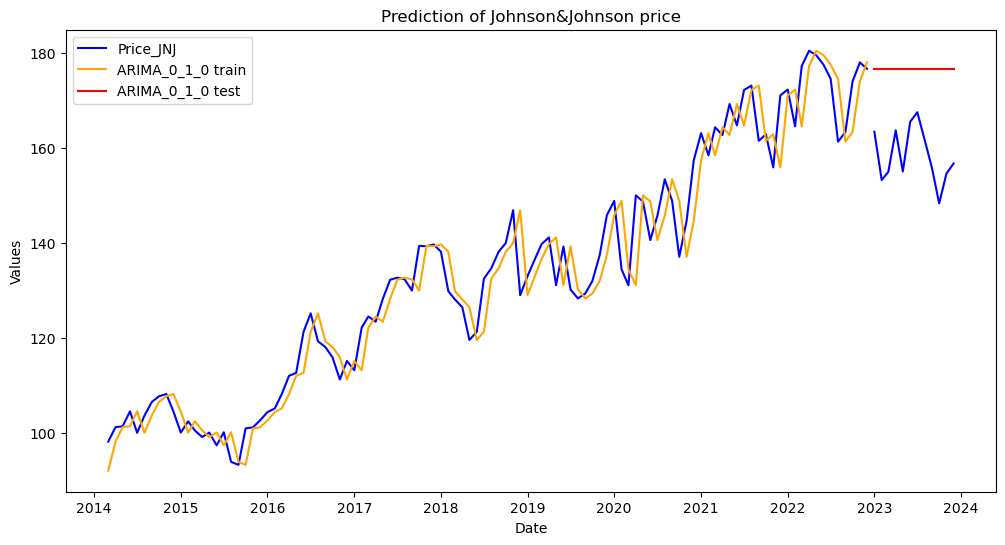

In [102]:
p = 0
i = 1
q = 0

train_and_plot(data_train=train,data_test=test,p=p,i=i,q=q,actual='Price_JNJ',length_test=length_test)

Considering all the combinations of p and q, we can identify that the optimal model is ARIMA (1,1,1) because it has the minimum value considering the informational criterion AIC.

<h4>Optimal ARIMA</h4>

In [103]:
p = 1
i_diff = 1 
q = 1
model_ARIMA_111 = ARIMA(train['Price_JNJ'], order=(p, i_diff, q)).fit()
print((model_ARIMA_111.summary()))

                               SARIMAX Results                                
Dep. Variable:              Price_JNJ   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -340.234
Date:                Sat, 29 Jun 2024   AIC                            686.469
Time:                        15:37:48   BIC                            694.459
Sample:                    02-01-2014   HQIC                           689.707
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.272      1.925      0.054      -0.010       1.056
ma.L1         -0.7243      0.216     -3.357      0.001      -1.147      -0.301
sigma2        35.8946      5.565      6.450      0.0

Analyzing the output from above, we can affirm that the model ARIMA (1,1,1) is the best because there are good results both from the informational criterion AIC (having the minimum value) as well as from the significance of the parameters (the probabilities being lower or equal compared to 0.05).

Also, for the residual tests, we can identify there is no autocorrelation and the residuals are normally distributed. However, the values of the probabilities show that the residuals are heteroscedastycs.

So, the model ARIMA (1,1,1) is the most suitable for this data set, but the variability of the residuals have to be taken into consideration.

<h3>Liniar regression model for Johnson&Johnson - Pfizer</h3>

<h5>Data import</h5>

In [104]:
df = pd.read_csv("JNJ.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

df2 = pd.read_csv("PFE.csv")
df2_copy=df2.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)
df2

,Price_PFE
Date,
2014-01-01,28.842505
2014-02-01,30.464895
2014-03-01,30.474382
2014-04-01,29.677420
2014-05-01,28.111954
...,...
2023-08-01,35.380001
2023-09-01,33.169998
2023-10-01,30.559999


<h4>Exploratory analysis</h4>

<h5>Histrogram for Pfizer close price in 2014-2024</h5>

Text(0.5, 1.0, 'Histogram for close price PFE')

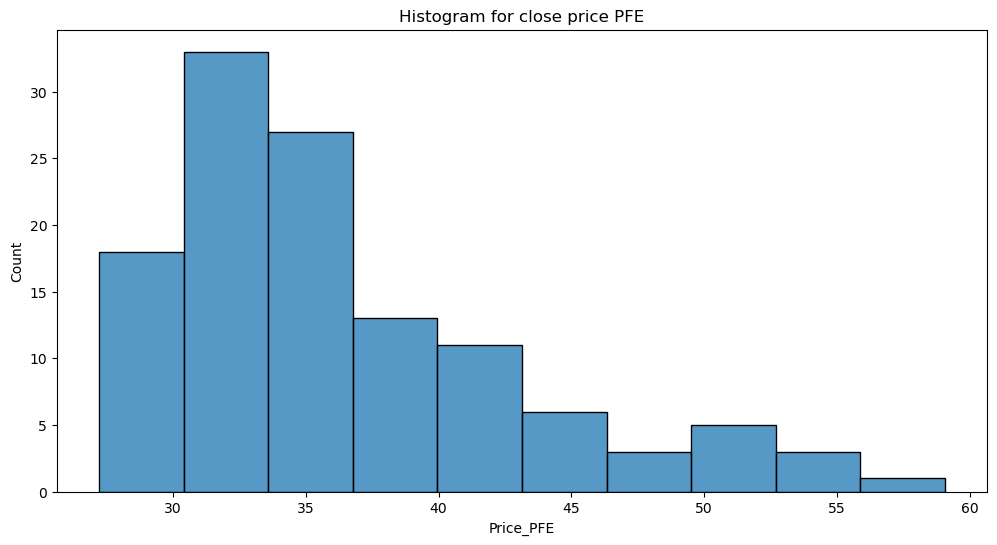

In [105]:
plt.figure(figsize=(12,6))
g = sns.histplot(df2['Price_PFE'])
g.set_title('Histogram for close price PFE')

In the graph from above, we can identify a histogram for Pfizer company price which have the asymetry on the right. This asymetry shows that the most values are small and concentrated on the left side if the graph, the highest frequencies have been recorded between 30 and 35 dollars. On the other hand, the higher prices have low frequencies and thus is the reason we have the asymetry on the right side.

<h5>Boxplot for Pfizer close price</h5>

In [106]:
df2['year']=df2.index.year

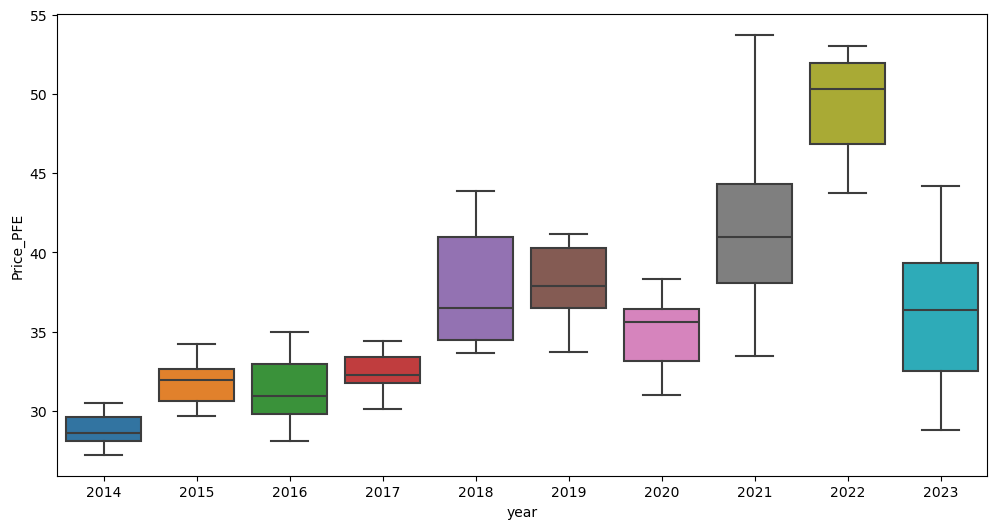

In [107]:
plt.figure(figsize=(12,6))
g = sns.boxplot(df2,x='year',y='Price_PFE',showfliers=0)

<h5>Checking the existing missing values</h5>

In [108]:
valori_lipsa = df2.isnull().any()
print("Missing values:")
print(valori_lipsa)

Missing values:
Price_PFE    False
year         False
dtype: bool


<h4>The evolution of close price PFE in 2014-2024</h4>

Text(0.5, 1.0, 'Close price PFE')

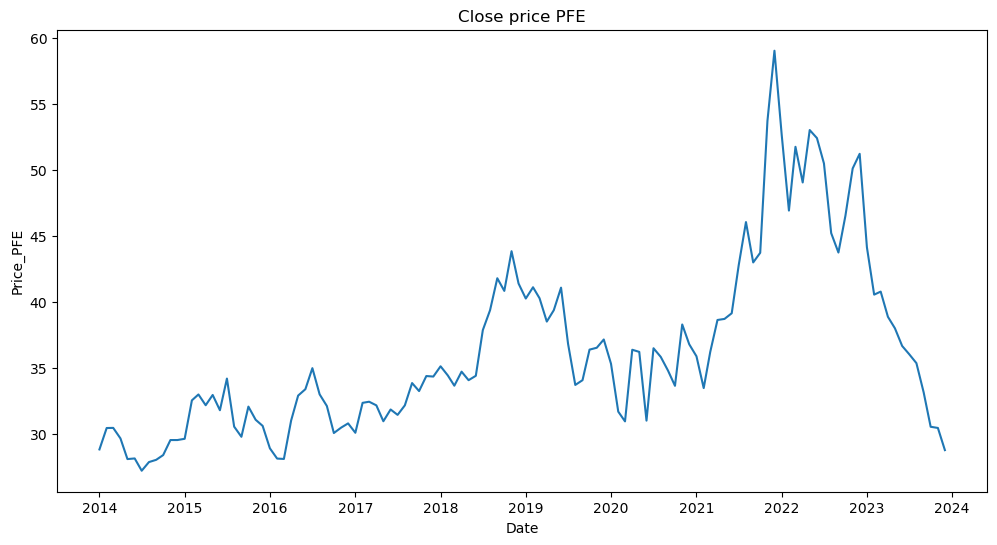

In [109]:
plt.figure(figsize=(12,6))
g = sns.lineplot(data=df2, x='Date',y='Price_PFE')
g.set_title('Close price PFE')

The graph from above shows tht evolution of Pfizer company's price in 2014-2024. We can notice that before the pandemic period, the values were relatively constant. Starting with 2019, the price for Pfizer have increased, registering the maximum value (approzimately 60 dollars) in 2022. Also, we can identify that starting with 2023, after the pandemic, the price values have been in a continuous decrease.

<h5>Data import</h5>

In [110]:
df_jnj = pd.read_csv("JNJ.csv")
df_jnj['Date'] = pd.to_datetime(df_jnj['Date'])
df_jnj.set_index('Date', inplace=True)

df_pfe = pd.read_csv("PFE.csv")
df_pfe['Date'] = pd.to_datetime(df_pfe['Date'])
df_pfe.set_index('Date', inplace=True)

In [111]:
jnj_close = df_jnj['Price_JNJ']
pfizer_close = df_pfe['Price_PFE']

In [112]:
df = pd.DataFrame({'Pfizer': pfizer_close, 'Johnson & Johnson': jnj_close}).dropna()

<h4>Regression model</h4>

In [113]:
model = LinearRegression()

In [114]:
X = df['Pfizer'].values.reshape(-1, 1)
y = df['Johnson & Johnson'].values

In [115]:
model.fit(X, y)

LinearRegression()

In [116]:
coef = model.coef_[0]
intercept = model.intercept_

In [117]:
print(f'Coefficient: {coef}')
print(f'Intercept: {intercept}')

Coefficient: 2.88613546079494
Intercept: 30.694301967001095


According to the regression model, we have a coefficient with approximately value 2.89 which means that if the close price for Pfizer increases by 1 dollar, we expect that the close price for Johnson&Johnson will increase by approximately 2.89 dollars.

In [118]:
jnj_pred = model.predict(X)

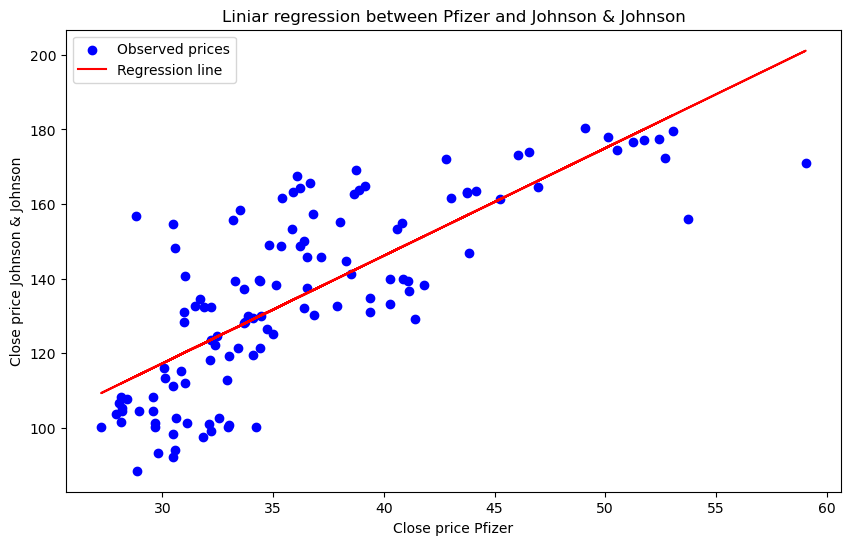

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Pfizer'], df['Johnson & Johnson'], color='blue', label='Observed prices')
plt.plot(df['Pfizer'], jnj_pred, color='red', label='Regression line')
plt.xlabel('Close price Pfizer')
plt.ylabel('Close price Johnson & Johnson')
plt.title('Liniar regression between Pfizer and Johnson & Johnson')
plt.legend()
plt.show()

<h4>Evaluating the regression model</h4>

In [120]:
print("MSE",round(mean_squared_error(df['Johnson & Johnson'],jnj_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(df['Johnson & Johnson'],jnj_pred)), 3))
print("MAE",round(mean_absolute_error(df['Johnson & Johnson'],jnj_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(df['Johnson & Johnson'],jnj_pred), 3))
print("R2 Score : ", round(r2_score(df['Johnson & Johnson'],jnj_pred), 3))

MSE 251.341
RMSE 15.854
MAE 12.661
MAPE 0.098
R2 Score :  0.598


The average standard error of the model predictions are approximately 15.854 price units. Considering an average, the model predictions differ by 12.661 price units from the real values for JNJ. Also, the model predictions are approximately 9.8% different from the real prices. R squared is 0.598 which means that approximately 59.8% of the variation in the JNJ price can be explained by the model. In other words, the model explain a significant of the variation, but there are still 40.2% which are not explained by this model, suggesting there are other influential factors.

In conclusion, the model is useful to understand the relationship between these two close prices, but could be improved by including other independent variables which could explain more of the JNJ price variation.